# Video Games Sales Data
This dataset contains records of popular video games in North America, Japan, Europe and other parts of the world. Every video game in this dataset has at least 100k global sales.

In [56]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 1000)
plt.style.use('ggplot')
df = pd.read_csv('vgsales.csv', index_col=0)
df = df.rename(str.lower, axis='columns') # change all column names to lower
df.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data Dictionary

| Column        | Explanation                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| Rank          | Ranking of overall sales                                                      |
| Name          | Name of the game                                                              |
| Platform      | Platform of the games release (i.e. PC,PS4, etc.)                             |
| Year          | Year the game was released in                                                 |
| Genre         | Genre of the game                                                             |
| Publisher     | Publisher of the game                                                         |
| NA_Sales      | Number of sales in North America (in millions)                                |
| EU_Sales      | Number of sales in Europe (in millions)                                       |
| JP_Sales      | Number of sales in Japan (in millions)                                        |
| Other_Sales   | Number of sales in other parts of the world (in millions)                     |
| Global_Sales  | Number of total sales (in millions)                                           |

[Source of dataset](https://www.kaggle.com/gregorut/videogamesales).

### Understand your variables


In [57]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,name,11493,"[Wii Sports, Super Mario Bros., Mario Kart Wii..."
1,platform,31,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ..."
2,year,39,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989...."
3,genre,12,"[Sports, Platform, Racing, Role-Playing, Puzzl..."
4,publisher,578,"[Nintendo, Microsoft Game Studios, Take-Two In..."
5,na_sales,409,"[41.49, 29.08, 15.85, 15.75, 11.27, 23.2, 11.3..."
6,eu_sales,305,"[29.02, 3.58, 12.88, 11.01, 8.89, 2.26, 9.23, ..."
7,jp_sales,244,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9..."
8,other_sales,157,"[8.46, 0.77, 3.31, 2.96, 1.0, 0.58, 2.9, 2.85,..."
9,global_sales,623,"[82.74, 40.24, 35.82, 33.0, 31.37, 30.26, 30.0..."


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16598 non-null  object 
 1   platform      16598 non-null  object 
 2   year          16327 non-null  float64
 3   genre         16598 non-null  object 
 4   publisher     16540 non-null  object 
 5   na_sales      16598 non-null  float64
 6   eu_sales      16598 non-null  float64
 7   jp_sales      16598 non-null  float64
 8   other_sales   16598 non-null  float64
 9   global_sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


### Cleaning variables

In [59]:
for column in df.columns:
    print(f'Column {column} has {df[column].isna().sum()} empty values ({df[column].isna().sum() / df.shape[0] * 100:.2f}%)')

Column name has 0 empty values (0.00%)
Column platform has 0 empty values (0.00%)
Column year has 271 empty values (1.63%)
Column genre has 0 empty values (0.00%)
Column publisher has 58 empty values (0.35%)
Column na_sales has 0 empty values (0.00%)
Column eu_sales has 0 empty values (0.00%)
Column jp_sales has 0 empty values (0.00%)
Column other_sales has 0 empty values (0.00%)
Column global_sales has 0 empty values (0.00%)


### Number of empty values is very low.

In [60]:
# removing the final 3 years because of low number of data available
# df = df[df['year'] < 2016].reset_index()

### Lets start

In [61]:
# aggregating sales by year
df_temp = df.groupby('year')['global_sales'].agg(['sum', 'count']).reset_index()

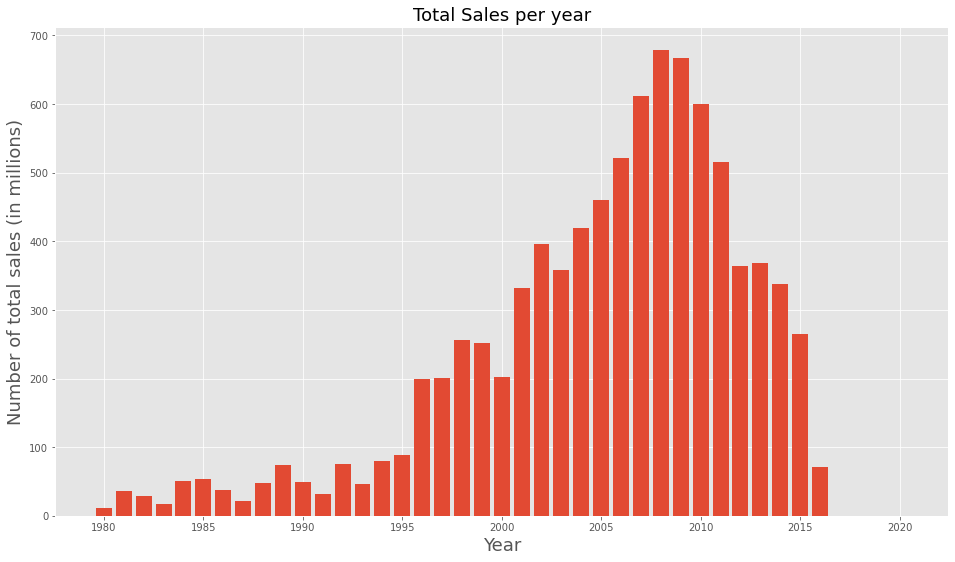

In [62]:
plt.figure(figsize=(16,9))
plt.bar(df_temp['year'], df_temp['sum'])
plt.xlabel('Year', fontdict={'size': 18})
plt.ylabel('Number of total sales (in millions)', fontdict={'size': 18})
plt.title('Total Sales per year', fontdict={'size': 18})
plt.show()

### Lets also plot how many games were released per year, so we can verify if the amount of games is due to more games being released or if games are selling more units

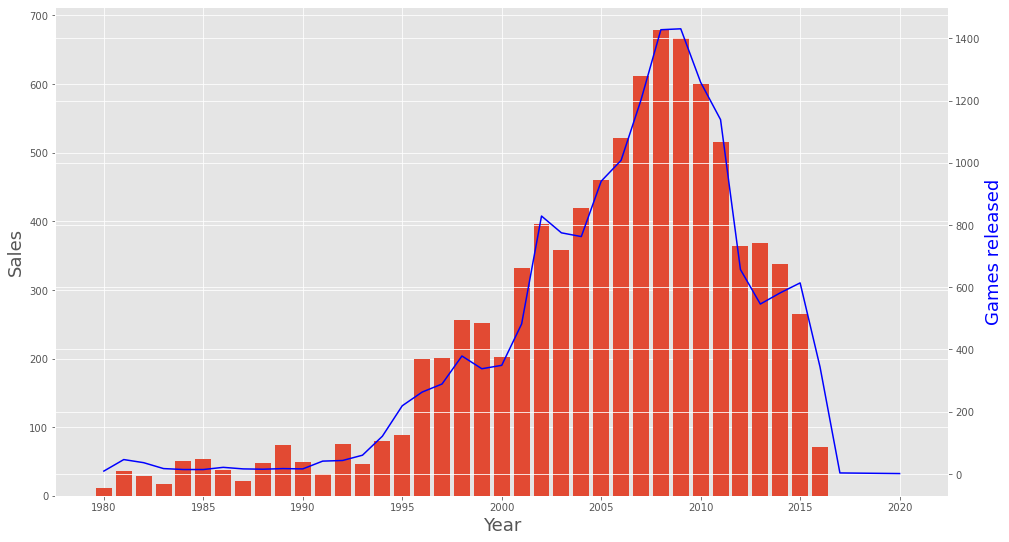

In [63]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(df_temp['year'], df_temp['sum'])
ax.set_ylabel('Sales', fontdict={'size': 18})
ax.set_xlabel('Year', fontdict={'size': 18})
ax.tick_params('y') #set color of ticks 
ax2 = ax.twinx() #creates another plot on the same x axis
ax2.plot(df_temp['year'], df_temp['count'], color='blue')
ax2.set_ylabel('Games released', color='blue', fontdict={'size': 18})
plt.show()

### The average number of sales per game in the first years of our dataset is quite high. That could be explained by the fact that we have a lot of classic games released before 1991, and these titles have sold an incredible amount of copies, as we can see below:

In [64]:
df[df['year'] < 1991].head(15)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51


### If we plot the average number of units sold per game released per year, we can see how higher that number is for the first 10 years of our dataset:

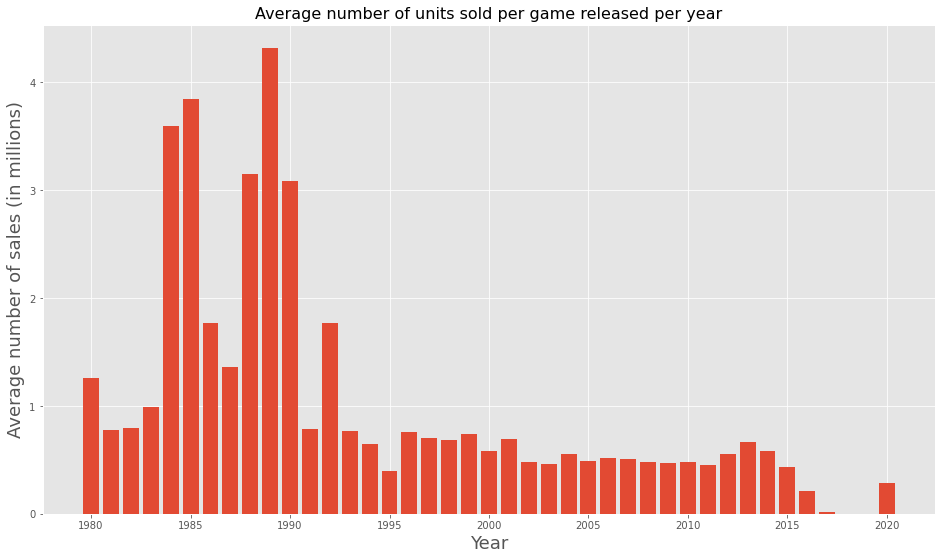

In [65]:
df_temp['avg_PY'] = round(df_temp['sum'] / df_temp['count'], 2)
plt.figure(figsize=(16,9))
plt.bar(df_temp['year'], df_temp['avg_PY'])
plt.xlabel('Year', fontdict={'size': 18})
plt.ylabel('Average number of sales (in millions)', fontdict={'size': 18})
plt.title('Average number of units sold per game released per year', fontdict={'size': 16})
plt.show()

### Which console has the highest number of games sold for its platform?

In [66]:
# Percentage of each platform sales
df_temp = df.groupby('platform')['global_sales'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False).reset_index()# / df['global_sales'].sum() * 100
df_temp['pct_total_sales'] = round(df_temp['sum'] / df_temp['sum'].sum(), 4) * 100
df_temp.rename(columns={'sum': 'total_sales', 'count': 'games', 'mean': 'avg_per_game'}, inplace=True)
df_temp.head(15)

,platform,total_sales,games,avg_per_game,pct_total_sales
0,PS2,1255.64,2161,0.581046,14.08
1,X360,979.96,1265,0.774672,10.99
2,PS3,957.84,1329,0.720722,10.74
3,Wii,926.71,1325,0.699404,10.39
4,DS,822.49,2163,0.380254,9.22
5,PS,730.66,1196,0.610920,8.19
6,GBA,318.50,822,0.387470,3.57
7,PSP,296.28,1213,0.244254,3.32
8,PS4,278.10,336,0.827679,3.12
9,PC,258.82,960,0.269604,2.90


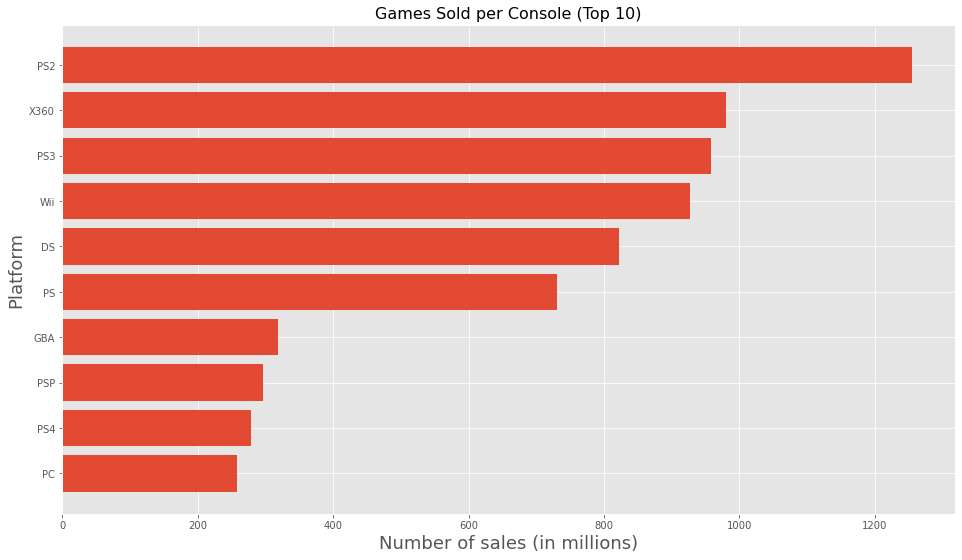

In [67]:
plt.figure(figsize=(16,9))
plt.barh(df_temp['platform'].head(10), df_temp['total_sales'].head(10))
plt.gca().invert_yaxis()
plt.xlabel('Number of sales (in millions)', fontdict={'size': 18})
plt.ylabel('Platform', fontdict={'size': 18})
plt.title('Games Sold per Console (Top 10)', fontdict={'size': 16})
plt.show()

### Interesting to see that the PlayStation 2 has a very confortable 4% lead, while the next 5 consoles have similar numbers, dropping down significantly after them to 3% and lower.

### However, if we look at the average number of sales per game released, we see that 2 consoles are very much above the rest:

In [68]:
df_temp.sort_values('avg_per_game', ascending=False).head(5)

,platform,total_sales,games,avg_per_game,pct_total_sales
11,GB,255.45,98,2.606633,2.86
12,NES,251.07,98,2.561939,2.81
22,GEN,28.36,27,1.050370,0.32
15,SNES,200.05,239,0.837029,2.24
8,PS4,278.10,336,0.827679,3.12


### If we look at the games sold on these consoles, we can understand why. Mario and the Pokémon series are two of the most popular gaming franchises ever, and we can see how many sales they have below:

In [69]:
df[(df['platform'] == 'GB') | (df['platform'] == 'NES')].head(10)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18


### Lets look at the different game genres. We see that the top 4 genres represent 55% of all video game sales, and action and sports game are even further separated from the rest of, totaling 35% between them.

In [70]:
# Percentage of each genre sales
df_temp = df.groupby('genre')['global_sales'].agg(['sum']).sort_values('sum', ascending=False).reset_index()
df_temp.rename(columns={'sum': 'total_sales'}, inplace=True)
df_temp['pct_total_sales'] = round(df_temp['total_sales'] / df_temp['total_sales'].sum(), 4) * 100
df_temp

,genre,total_sales,pct_total_sales
0,Action,1751.18,19.63
1,Sports,1330.93,14.92
2,Shooter,1037.37,11.63
3,Role-Playing,927.37,10.40
4,Platform,831.37,9.32
5,Misc,809.96,9.08
6,Racing,732.04,8.21
7,Fighting,448.91,5.03
8,Simulation,392.20,4.40
9,Puzzle,244.95,2.75


### Lets analyze the distribution of sales among regions to see if any region prefers a specific genre

In [71]:
df_temp = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum().reset_index()
df_temp['NA'] = round(df_temp['na_sales'] / df_temp['global_sales'], 4) * 100 
df_temp['EU'] = round(df_temp['eu_sales'] / df_temp['global_sales'], 4) * 100
df_temp['JP'] = round(df_temp['jp_sales'] / df_temp['global_sales'], 4) * 100
df_temp['Other'] = round(df_temp['other_sales'] / df_temp['global_sales'], 4) * 100
df_temp.drop(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'], axis=1, inplace=True)
df_temp

,genre,NA,EU,JP,Other
0,Action,50.13,29.98,9.13,10.70
1,Adventure,44.26,26.83,21.78,7.03
2,Fighting,49.81,22.57,19.46,8.17
3,Misc,50.65,26.67,13.30,9.30
4,Platform,53.77,24.25,15.73,6.21
5,Puzzle,50.53,20.73,23.40,5.12
6,Racing,49.10,32.57,7.74,10.56
7,Role-Playing,35.29,20.28,37.99,6.43
8,Shooter,56.16,30.20,3.69,9.90
9,Simulation,46.74,28.91,16.24,8.04


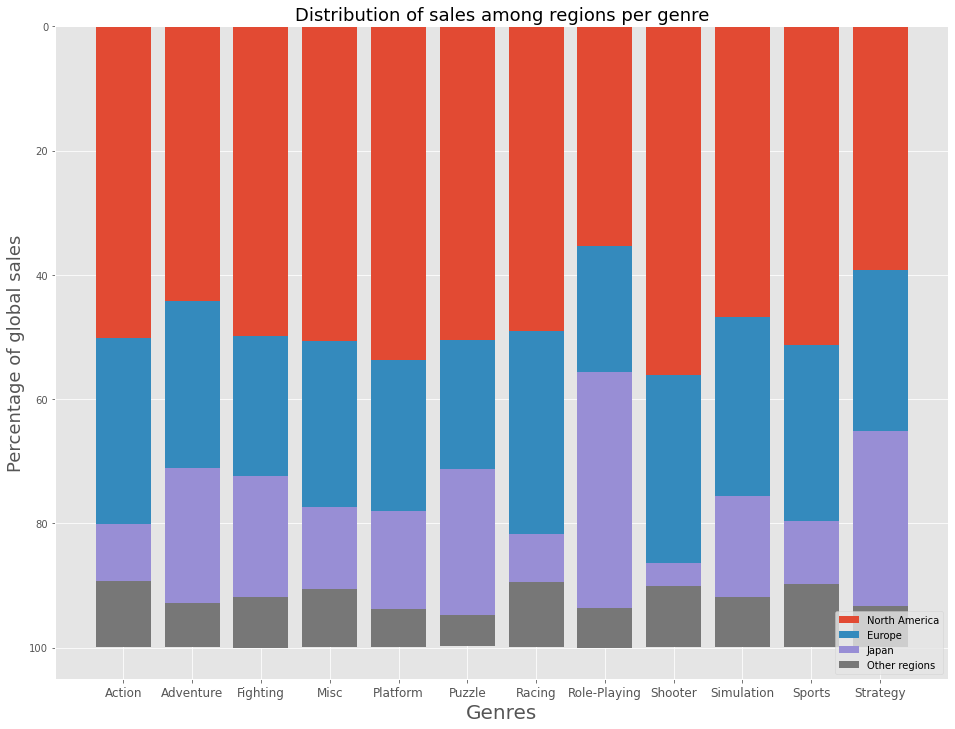

In [72]:
plt.figure(figsize=(16,12))
plt.bar(df_temp['genre'], df_temp['NA'])#, color='r')
plt.bar(df_temp['genre'], df_temp['EU'], bottom=df_temp['NA'])#, color='b')
plt.bar(df_temp['genre'], df_temp['JP'], bottom=df_temp['NA']+df_temp['EU'])#, color='y')
plt.bar(df_temp['genre'], df_temp['Other'], bottom=df_temp['NA']+df_temp['EU']+df_temp['JP'])#, color='g')
plt.xlabel("Genres", fontdict={'size': 20})
plt.xticks(fontsize=12)
plt.ylabel("Percentage of global sales", fontdict={'size': 18})
plt.legend(["North America", "Europe", "Japan", "Other regions"], loc='lower right')
plt.title("Distribution of sales among regions per genre", fontdict={'size': 18})
plt.gca().invert_yaxis()
plt.show()

### Is there anything that jumps out?


### RPG (Role-Playing-Games) absolutely dominate the japanese market, being by far the most popular genre for that region. Strategy games are also very popular, while shooters and racing games perform very poorly.

### North America seems to have a preference for shooters and platforms, but overall the marketshare for all genres are very similar, apart from RPGs and strategy games, that are a few percentage points below the rest.

### Europe has the most homogeneous distribution, with sports games taking the lead, while the rest of the genres are separated by a 1% or 2%  between them.

### This is a video game sales dataset afterall. So now lets look at the most sold games of our dataset.

### A simple look at the data shows that the games are sorted by total sales:

In [73]:
df.head(15)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


### However, each entry of our dataset represents a game releasead on a different platform. That means that games that are multiplatform (and most of games are) appear more than once, as we can see below:

In [74]:
df.groupby('name').count().sort_values('platform', ascending=False)['platform'].head(15)

name
Need for Speed: Most Wanted                12
Ratatouille                                 9
Madden NFL 07                               9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Monopoly                                    8
LEGO Jurassic World                         8
FIFA Soccer 13                              8
Lego Batman 3: Beyond Gotham                8
FIFA 15                                     8
LEGO Star Wars II: The Original Trilogy     8
The LEGO Movie Videogame                    8
Cars                                        8
LEGO The Hobbit                             8
Madden NFL 08                               8
Name: platform, dtype: int64

### So, if we want to see the number of total sales per game, we need to aggregate our data by name:

In [75]:
df.groupby('name').sum().sort_values('global_sales', ascending=False).reset_index()[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].head(15)

,name,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
3,Tetris,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
5,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
7,Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.03
8,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
9,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


### Now, the picture of top sellers changes a bit. We can see that popular franchises like Grand Theft Auto V and Call of Duty (with 5 different games) have now cracked the top 15.

### Can we try and group games by franchises? Our dataset does not have any indicators of when a game belongs to a franchise. So lets try to create that.

### First, lets extract a big list of video game franchises from the internet

In [190]:
# list of video game franchises taken from https://ultimatepopculture.fandom.com/wiki/List_of_video_game_franchises
franchises = '''
Age of Wonders
Alan Wake
Alex Kidd
Alien Breed
Alien vs. Predator
Alone in the Dark
Altered Beast
Alundra
American McGee's Alice
America's Army
Amped
Angry Birds
Animal Crossing
Ape Escape
Arc the Lad
Armored Core
Army Men
Army of Two
Art of Fighting (Ryuuko no Ken)
Asheron's Call
Assassin's Creed
Asterix Games
Asteroids
ATV Offroad Fury
B
Babylonian Castle Saga (also known as The Tower of Druaga)
Backyard Sports
Backyard Wrestling
Baldur's Gate
Banjo-Kazooie
Bard's Tale
Baten Kaitos
Batman Arkham
Battle Arena Toshinden
Battlefield
Battle Isle
Beatmania
Bejeweled
Berzerk
Big Mutha Truckers
Bionic Commando
Bioshock
The Black Mirror
Black & White
BlazBlue
Blinx
Blitz: The League
BloodRayne
Bloody Roar
Bobby Carrot
Boktai
Bomberman
Bonk
Borderlands
Boulder Dash
Brain Age
Breakout
Breath of Fire
Broken Sword
Brothers in Arms
Bubble Bobble
Bubsy
Bully
Burnout
Bust a Groove
Bust-A-Move
Buzz!
C
Cabela's
Call of Cthulhu
Call of Duty
Call of Juarez
Cannon Fodder
Carmageddon
Castlevania
Chessmaster
Chibi-Robo!
Chrono
City of Heroes
Civilization
Clock Tower
Colin McRae Rally
Colony Wars
Combat Mission
Command & Conquer
Commando
Commandos
Condemned
Conflict
Conker
Contra
Cool Boarders
Cossacks
Counter-Strike
Crackdown
Crash Bandicoot
Crazy Taxi
Croc
Crysis
D
D
Dance Dance Revolution
Darkstalkers
Dark Cloud
Dead or Alive
Dead Space
Deer Avenger
Deer Hunter
Defender
Delta Force
Descent
Descent: FreeSpace – The Great War
Destroy All Humans!
Destruction Derby
Deus Ex
Devil May Cry
Diablo
Dino Crisis
Digimon
Disgaea
Dizzy series
Donkey Kong
Doom
Double Dragon
Dragon Age
Dragon Buster
Dragon Slayer
Dragon Quest (Dragon Warrior)
Dragon's Lair
Drakan
Drakengard
Dream Chronicles
Duke Nukem
Dungeon Keeper
Dynasty Warriors (Shin Sangoku Musou)
E
EarthBound (Mother)
Earthworm Jim
Eat Lead
Ecco the Dolphin
ECW Games
Eggerland (Adventures of Lolo)
The Elder Scrolls
Empire Earth
Enemy Territory
EOE
Etrian Odyssey
Europa Universalis
EverQuest
Excitebike
Extreme-G
F
F-Zero
Fable
Far Cry
Fatal Fury (Garou Densetsu)
Fallout
Fatal Frame
F.E.A.R.
FIFA
Fighting Force
Fight Night
Final Fantasy
Final Fight
Fire Emblem
Fire Pro Wrestling
Five Nights at Freddy's
Flight Simulator
Football Manager
Fortnite
Forza Motorsport
Frogger
Front Mission
Full Auto
G
Gabriel Knight
Galactic Civilizations
Galaga/Galaxian
Gauntlet
Gears of War
Genji
The Getaway
Gex
Ghost in the Shell
Ghost Recon
Ghostbusters
Ghosts 'n Goblins
God of War
The Godfather
Golden Axe
Golden Sun
Gothic
Gradius
Gran Turismo
Grand Chase
Grand Theft Auto
Grandia
Growlanser
Guilty Gear
Guitar Hero
Gungrave
H
.hack
Half-Life
Halo
Harvest Moon
Hearts of Iron
Hebereke
Hercules no Eikō
Heretic
Heroes of Might and Magic
Hitman
Hollow Knight
House of the Dead
I
inFamous
J
Jak and Daxter
Jazz Jackrabbit
Jetfighter
Jet Set Radio (Jet Grind Radio)
Jet Moto
The Journeyman Project
Jump Stars
Jumping Flash!
Just Cause
K
Katamari Damacy
Kid Icarus
Kick Off
Killzone
Kingdom Hearts
King of Fighters
King's Quest
Kirby
Klonoa
Kunio-kun
L
The Last Blade
Left 4 Dead
Legacy of Kain
Legend of Legaia
The Legend of Zelda
Lego Star Wars
Leisure Suit Larry
Lemmings
Lineage
LittleBigPlanet
Loaded
LocoRoco
The Longest Journey
Lords of the Realm
Lost Planet
The Lost Vikings
Lotus
Lufia
Luminous Arc
Lunar
Lunia
M
Madden NFL
Manhunt
Marathon Trilogy
Mario
Marl Kingdom
Mass Effect
Master of Orion
The Matrix
Max Payne
MechWarrior
Medal of Honor
MediEvil
Mega Man (Rockman)
Megami Tensei
Mercenaries
Metal Gear
Metal Slug
Metroid
MDK
Midnight Club
Midtown Madness
Might and Magic
Minecraft
Miner Willy
Monkey Island
Monster Hunter
Monster Rancher
Mortal Kombat
Mother
Moto GP
MotorStorm
Mr. Do
Musashi
Mystery Case Files
Mystical Ninja (Ganbare Goemon)
Myth
N
No More Heroes
Need for Speed
Neutopia
Neverwinter Nights
Nights
Ninja Gaiden
O
Oddworld
Of Mana
Onimusha
Out Run
P
Pac-Man
Painkiller
PaRappa the Rapper
Parasite Eve
Penumbra
Panzer Dragoon
Panzer General
Peggle
Perfect Dark
Phantasmagoria
Phantasy Star
Pikmin
Pilotwings
Pitfall!
PixelJunk
Pong
Pokemon
Police Quest
Populous
Portal
Postal
Power Stone
Prince of Persia
Pro Evolution Soccer
Professor Layton
Project Gotham Racing
Pump It Up
Puyo Puyo
Q
Q*bert
Quake
Quest for Glory
R
R-Type
Railroad Tycoon
Rainbow Six
Rampage
Ratchet & Clank
Raving Rabbids
Rayman
Red Dead
Red Faction
Redneck Rampage
Red Steel
Resident Evil (BioHazard)
Resistance
Ridge Racer
Rival Schools (Justice Gakuen)
Road Rash
Rock Band
RollerCoaster Tycoon
Romance of the Three Kingdoms
Rumble Roses
S
SaGa
Saints Row
Sakura Wars
Samurai Showdown (Samurai Spirits)
Sega Rally
Sensible Soccer
Serious Sam
The Settlers
Shadow Hearts
Shadow Man
Shadowgate
Shadowgrounds
Shenmue
Shining
Shinobi
Shovel Knight
Shutokō Battle (Tokyo Xtreme Racer / Tokyo Highway Challenge)
Silent Hill
SimCity
The Sims
Siren (Forbidden Siren)
Skate
Sly Cooper
SOCOM
Soldier of Fortune
Sonic
SoulCalibur
Space Channel 5
Space Empires
Space Invaders
Space Quest
Splatterhouse
Splinter Cell
Spy Fox
Spy Hunter
Spyro
S.T.A.L.K.E.R.
Star Control
Star Cruiser
Star Fox
Star Ocean
Star Soldier
Star Wars
Star Wars: Battlefront
StarCraft
StarTropics
State of Emergency
Street Fighter
Streets of Rage (Bare Knuckle)
Stronghold
Stuntman
The Suffering
Suikoden
Summer Games
Super Monkey Ball
Super Robot Wars
Super Smash Bros.
Syphon Filter
System Shock
T
Tales of
Tap Tap
Tekken
Test Drive
Tetris
Tempest
Tenchu
Theme Park
Thief
Thunder Force
Time Crisis
TimeSplitters
Tokimeki Memorial
To Heart
Too Human
Tomb Raider
Tomba!
Tony Hawk
Tony La Russa Baseball
Total War
The Tower of Druaga (also known as Babylonian Castle Saga)
Trauma Center
Tribes
Turok
Twisted Metal
Ty the Tasmanian Tiger
U
Uncharted
Uncharted Waters
Unreal
Untold Legends
V
Valkyrie Profile
Vectorman
Vietcong
Viewtiful Joe
Virtua Cop
Virtua Fighter
Virtual Woman
W
Warcraft
Warhammer
Warhammer 40,000
Wario
Warlords
Wave Race
Wii Fit
Wii Sports
Wild Arms
WinBack
Wing Commander
WipEout
Wizardry
Wolfenstein
Wonder Boy
Worms
WWE SmackDown vs. Raw
X
X
X-COM
Xenosaga
Y
Yoshi
Ys
Z
Zone of the Enders
Zoo Tycoon
Zork
'''.split('\n')

### Lets clean our list, removing single-digit entries:

In [191]:
franchises = list(filter(lambda x: len(x) > 1, franchises))
franchises[:5]

['Age of Wonders',
 'Alan Wake',
 'Alex Kidd',
 'Alien Breed',
 'Alien vs. Predator']

### Lets create a new column, indicating the franchise of which a game belongs

In [192]:
# create franchise column
df['franchise'] = ""
df = df[['name', 'platform', 'year', 'genre', 'publisher', 'franchise', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
df

,name,platform,year,genre,publisher,franchise,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,,0.00,0.00,0.00,0.00,0.01


### Lets loop through each franchise and find games that contain the franchise name in its title, inserting the franchise name into the respective column whenever we find matches:

In [265]:
%%capture
for franchise in franchises:
    df.loc[df['name'].str.contains(franchise), 'franchise'] = franchise
#     df.loc[df['name'].str.contains(fr'{franchise}$|{franchise} [0-9]|{franchise}:', case=False), 'franchise'] = franchise

In [267]:
df.head(20)

,name,platform,year,genre,publisher,franchise,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,Wii Sports,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,Mario,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Mario,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Wii Sports,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,Pokemon,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,Tetris,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,Mario,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,Mario,14.59,7.06,4.70,2.26,28.62


In [268]:
df_temp = df.groupby('franchise').sum().reset_index().sort_values('global_sales', ascending=False)
df_temp = df_temp[['franchise', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
df_temp = df_temp[df_temp['franchise'] != ""]
df_count = df.groupby('franchise')['name'].nunique().reset_index()
df_count = df_count[df_count['franchise'] != ""]
df_count.rename(columns={'name': 'games'}, inplace=True)
df_franchises = df_temp.merge(df_count, on='franchise')
df_franchises = df_franchises[['franchise', 'games', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
df_franchises.head(20)

,franchise,games,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Mario,89,262.95,116.06,109.08,26.74,514.78
1,Call of Duty,20,129.39,83.71,4.20,30.13,247.44
2,Pokemon,35,79.08,49.71,64.44,9.21,202.51
3,FIFA,41,34.04,105.89,2.74,32.06,174.85
4,Grand Theft Auto,11,69.35,50.55,3.46,27.01,150.33
5,Madden NFL,23,104.46,7.50,0.14,10.66,122.65
6,Star Wars,50,68.33,37.45,0.77,11.71,118.33
7,Wii Sports,3,57.43,40.17,7.09,11.45,116.14
8,Sonic,51,56.62,41.92,5.42,10.88,114.85
9,Final Fantasy,67,35.92,19.25,48.79,8.32,112.30


### We now have a dataset of sales by franchises, with the number of units sold by region and the number of unique games released from that franchise. Lets explore.

### Lets start with the franchises that have the most games released:

In [257]:
df_franchises.sort_values('games', ascending=False).head(20)

,franchise,games,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Mario,89,262.95,116.06,109.08,26.74,514.78
9,Final Fantasy,67,35.92,19.25,48.79,8.32,112.30
8,Sonic,51,56.62,41.92,5.42,10.88,114.85
6,Star Wars,50,68.33,37.45,0.77,11.71,118.33
15,The Sims,42,30.91,28.01,0.05,6.29,65.29
3,FIFA,41,34.04,105.89,2.74,32.06,174.85
2,Pokemon,35,79.08,49.71,64.44,9.21,202.51
54,Tales of,34,3.43,2.12,12.50,0.93,18.99
80,Harvest Moon,31,7.86,1.50,2.53,0.69,12.55
143,King of Fighters,30,1.42,0.58,2.54,0.26,4.79


### The Mario franchise sits at the top with a massive 89 different games released. That makes sense, since the first Mario game in our dataset was released in 1889 for the Atari:

In [258]:
df[df['franchise'] == 'Mario'].nsmallest(1, 'year')

,name,platform,year,genre,publisher,franchise,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,,
1165,Mario Bros.,2600,1982.0,Platform,Atari,Mario,1.48,0.09,0.0,0.02,1.59


### The next franchises in our list are all very popular, like Final Fantasy, Sonic, Star Wars and FIFA.

### What if we calculate te average number of sales per game released for each franchise, filtering our data to only show franchises with more than 50 million units sold? 

In [264]:
df_franchises['average'] = round(df_franchises['global_sales'] / df_franchises['games'], 2)
df_franchises[df_franchises['global_sales'] > 50].sort_values('average', ascending=False).head(20)

,franchise,games,na_sales,eu_sales,jp_sales,other_sales,global_sales,average
7,Wii Sports,3,57.43,40.17,7.09,11.45,116.14,38.71
4,Grand Theft Auto,11,69.35,50.55,3.46,27.01,150.33,13.67
1,Call of Duty,20,129.39,83.71,4.20,30.13,247.44,12.37
13,Gran Turismo,10,23.21,24.06,10.48,14.47,72.21,7.22
2,Pokemon,35,79.08,49.71,64.44,9.21,202.51,5.79
0,Mario,89,262.95,116.06,109.08,26.74,514.78,5.78
11,Assassin's Creed,15,39.34,31.88,1.45,10.91,83.56,5.57
14,Halo,12,45.95,15.33,0.58,4.63,66.53,5.54
5,Madden NFL,23,104.46,7.50,0.14,10.66,122.65,5.33
10,Need for Speed,20,43.41,35.83,1.00,12.69,92.90,4.65


### With that metric applied, we see that our top franchises change quite a lot. Wii Sports, with only 3 unique games released, takes the top spot. Next comes the GTA franchise, followed by Call of Duty. Remember these 2 names from earlier?

### Gran Turismo, the Sony rancing games, Pokemon and Mario all follow, with very similar averages.

### Great to see Tony Hawk, a personal favorite of mine, on this list.

In [262]:
df[df['franchise'] == 'Wii Fit']

,name,platform,year,genre,publisher,franchise,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,,
14,Wii Fit,Wii,2007.0,Sports,Nintendo,Wii Fit,8.94,8.03,3.60,2.15,22.72
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,Wii Fit,9.09,8.59,2.53,1.79,22.00
2350,Wii Fit U,WiiU,2013.0,Sports,Nintendo,Wii Fit,0.39,0.24,0.21,0.06,0.89


In [197]:
df_franchises.sort_values('other_sales', ascending=False)

,franchise,games,na_sales,eu_sales,jp_sales,other_sales,global_sales,average
3,FIFA,142,34.04,105.89,2.74,32.06,174.85,1.23
1,Call of Duty,59,129.39,83.71,4.20,30.13,247.44,4.19
4,Grand Theft Auto,26,69.35,50.55,3.46,27.01,150.33,5.78
0,Mario,100,262.95,116.06,109.08,26.74,514.78,5.15
13,Gran Turismo,10,23.21,24.06,10.48,14.47,72.21,7.22
10,Need for Speed,75,43.41,35.83,1.00,12.69,92.90,1.24
6,Star Wars,115,68.33,37.45,0.77,11.71,118.33,1.03
7,Wii Sports,3,57.43,40.17,7.09,11.45,116.14,38.71
11,Assassin's Creed,39,39.34,31.88,1.45,10.91,83.56,2.14
8,Sonic,80,56.62,41.92,5.42,10.88,114.85,1.44


In [204]:
df_franchises['NA'] = round(df_franchises['na_sales'] / df_franchises['global_sales'], 4) * 100 
df_franchises['EU'] = round(df_franchises['eu_sales'] / df_franchises['global_sales'], 4) * 100
df_franchises['JP'] = round(df_franchises['jp_sales'] / df_franchises['global_sales'], 4) * 100
df_franchises['Other'] = round(df_franchises['other_sales'] / df_franchises['global_sales'], 4) * 100
df_franchises.drop(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], axis=1, inplace=True)
df_franchises

,franchise,games,global_sales,average,NA,EU,JP,Other
0,Mario,100,514.78,5.15,51.08,22.55,21.19,5.19
1,Call of Duty,59,247.44,4.19,52.29,33.83,1.70,12.18
2,Pokemon,35,202.51,5.79,39.05,24.55,31.82,4.55
3,FIFA,142,174.85,1.23,19.47,60.56,1.57,18.34
4,Grand Theft Auto,26,150.33,5.78,46.13,33.63,2.30,17.97
5,Madden NFL,96,122.65,1.28,85.17,6.11,0.11,8.69
6,Star Wars,115,118.33,1.03,57.75,31.65,0.65,9.90
7,Wii Sports,3,116.14,38.71,49.45,34.59,6.10,9.86
8,Sonic,80,114.85,1.44,49.30,36.50,4.72,9.47
9,Final Fantasy,89,112.30,1.26,31.99,17.14,43.45,7.41


In [214]:
df_franchises[df_franchises['global_sales'] > 10].sort_values('NA', ascending=False)

,franchise,games,global_sales,average,NA,EU,JP,Other
5,Madden NFL,96,122.65,1.28,85.17,6.11,0.11,8.69
87,Twisted Metal,8,10.19,1.27,84.99,10.89,0.00,3.93
74,Frogger,20,13.52,0.68,81.14,15.01,0.00,3.85
67,SOCOM,10,15.44,1.54,75.39,14.38,1.88,8.42
59,Cabela's,67,17.80,0.27,73.65,17.64,0.00,8.88
40,Pac-Man,37,27.05,0.73,73.20,16.56,4.92,5.47
39,Rock Band,50,28.15,0.56,71.87,17.55,0.00,10.87
26,Mortal Kombat,34,37.80,1.11,71.24,20.95,0.05,7.70
14,Halo,14,66.53,4.75,69.07,23.04,0.87,6.96
57,Midnight Club,12,18.23,1.52,67.80,20.19,0.44,11.57


In [83]:
# publisher (figure out graph)
df_temp = df.groupby('franchise').sum().reset_index().sort_values('global_sales', ascending=False)
df_temp = df_temp[['franchise', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
df_temp = df_temp[df_temp['franchise'] != ""]
df_temp

,franchise,na_sales,eu_sales,jp_sales,other_sales,global_sales
193,Mario,270.01,127.69,111.24,29.44,538.34
53,Call of Duty,129.39,83.71,4.20,30.13,247.44
237,Pokemon,74.68,46.94,60.48,8.44,190.61
119,FIFA,34.04,105.86,2.74,32.05,174.80
149,Grand Theft Auto,69.35,50.55,3.46,27.01,150.33
190,Madden NFL,104.46,7.50,0.14,10.66,122.65
300,Star Wars,67.71,37.29,0.77,11.69,117.53
362,Wii Sports,57.43,40.17,7.09,11.45,116.14
126,Final Fantasy,34.92,19.00,48.38,8.27,110.60
219,Need for Speed,43.41,35.83,1.00,12.69,92.90


In [151]:
# df.to_excel("output.xlsx")

# over

# Insights:
Most popular games by region and global

Most popular genres

Most popular because more games? avg units sold per game

Most popular publisher

Sales per year

Most Sales by Console

Best console for each Publisher